In [20]:
import pandas as pd
from urllib.parse import urlparse
from collections import defaultdict

In [115]:
df = pd.read_csv("../train/storyzy_en_train.tsv", sep='\t')
df

,id,domain,type,uri,author,language,title,text,date,external_uris
0,979,vactruth.com,fakeNews,https://vactruth.com/2011/05/02/hivaids-in-afr...,NaN,en,HIV/AIDS in Africa Caused Through Doctors Vacc...,In 1998 the San Francisco Chronicle published ...,2017-09-20,http://www.sfgate.com/cgi-bin/article.cgi|http...
1,1058,vactruth.com,fakeNews,https://vactruth.com/2009/11/12/h1n1-injection...,Rob Stein and Michael Laris,en,H1N1 injection (and spray) rejection.,The biggest frustration facing many doctors is...,2009-11-08,http://www.washingtonpost.com/wp-dyn/content/a...
2,3608,vaccineswork.org,trusted,http://www.vaccineswork.org/against-the-odds-h...,NaN,en,Against the odds: how Haiti is taking back own...,"For years, the odds have been stacked against ...",2017-09-15,https://www.tumblr.com/share?v=3&u=http://www....
3,1483,washingtonpost.com,trusted,https://www.washingtonpost.com/opinions/if-tru...,Editorial Board,en,"If Trump keeps stoking vaccine fears, he will ...",Donald Trump’s transition team tried to tamp d...,2017-01-12,https://www.thelily.com|http://www.thelily.com...
4,88,news-medical.net,trusted,http://www.news-medical.net/news/20170224/Scie...,NaN,en,Scientists devise novel DNA vaccine approach a...,Scientists at The Wistar Institute and Inovio ...,2017-02-24,https://www.wistar.org/news-and-media/press-re...
5,4711,bbc.com,trusted,http://www.bbc.com/news/world-africa-38157123,NaN,en,HIV vaccine: Clinical trial begins in South Af...,"A new vaccine against HIV, the virus that caus...",2016-11-30,http://www.bbc.co.uk/news/10628994|http://www....
6,1747,ageofautism.com,fakeNews,http://www.ageofautism.com/2008/05/unauthorize...,Age of Autism,en,UNAUTHORIZED IMUS TRANSCRIPT.,The following is an unauthorized transcript of...,2009-04-22,http://profile.typepad.com/rescuepost|http://f...
7,2906,canberratimes.com.au,trusted,http://www.canberratimes.com.au/victoria/measl...,Larissa Ham,en,Measles outbreak: Eight of 11 cases linked to ...,Several more people in Melbourne have contract...,2017-10-01,https://www.betterhealth.vic.gov.au/health/con...
8,897,vactruth.com,fakeNews,https://vactruth.com/2016/03/07/8-vaccine-dose...,NaN,en,Louisiana Mother Knows 8 Vaccine Doses Killed ...,Two month-old Reid Thomas Englehart was vaccin...,2009-06-17,http://articles.mercola.com/sites/articles/arc...
9,4161,yournewswire.com,fakeNews,http://yournewswire.com/abc-reporter-flu-shot-...,NaN,en,ABC News Reporter Says Flu Shot Left Her Disab...,ABC Action News reporter Ashley Glass uploaded...,2016-11-10,https://www.cbsnews.com/news/this-years-flu-va...


In [116]:
citations = defaultdict(set)
is_fake = {}
for index, row in df.iterrows():
    try:
        external_domains = map(urlparse, row["external_uris"].split('|'))
        for domain_parsed in external_domains:
            citations[row['domain']].add(domain_parsed.netloc)
    except AttributeError:
        citations[row["domain"]] = []
    

In [117]:
df["domain"].value_counts()

news-medical.net                       277
vactruth.com                           242
reuters.com                            173
ageofautism.com                        172
smh.com.au                             165
washingtonpost.com                     150
canberratimes.com.au                   118
foxnews.com                            116
vaxxter.com                            114
nytimes.com                            112
vaccineswork.org                        96
huffingtonpost.com                      91
sciencedaily.com                        91
vaccineimpact.com                       86
independent.co.uk                       78
yournewswire.com                        64
theguardian.com                         57
bbc.com                                 45
thesciencepost.com                      41
theatlantic.com                         36
asheepnomore.net                        31
infowars.com                            30
stopmandatoryvaccination.com            29
sott.net   

In [118]:
import networkx as nx

In [119]:
g = nx.Graph()
for origin, externals in citations.items():
    g.add_node(origin)
    for link in externals:
        g.add_node(link.strip("www."))
        g.add_edge(origin, link.strip("www."))

In [120]:
g.number_of_nodes()

1428

In [121]:
g.number_of_edges()

1916

In [139]:
lonely_nodes = []
for node in g.node():
    if len(list(nx.all_neighbors(g, node))) == 0:
        lonely_nodes.append(node)
for node in lonely_nodes:
    g.remove_node(node)

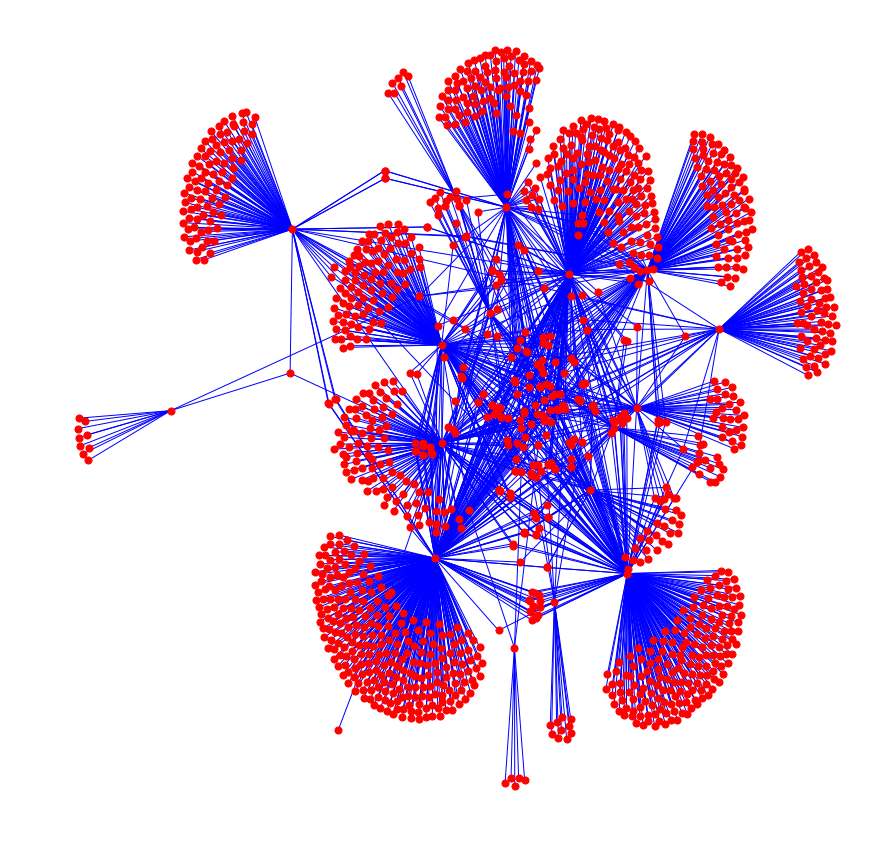

In [140]:
from matplotlib import pyplot as plt
f, axs = plt.subplots(figsize=(15,15))
nx.draw_spring(g, with_labels=False, edge_color="b", node_size=50)
plt.savefig("/tmp/graph.png")

In [141]:
isfake_dict = {}
for idx, row in df.iterrows():
    isfake_dict[row["domain"]] = row["type"] == "fakeNews"

In [142]:
color_list = []
for node in g.nodes:
    if node in isfake_dict:
        if isfake_dict[node]:
            color_list.append("red")
        else:
            color_list.append("green")
    else:
        color_list.append("blue")

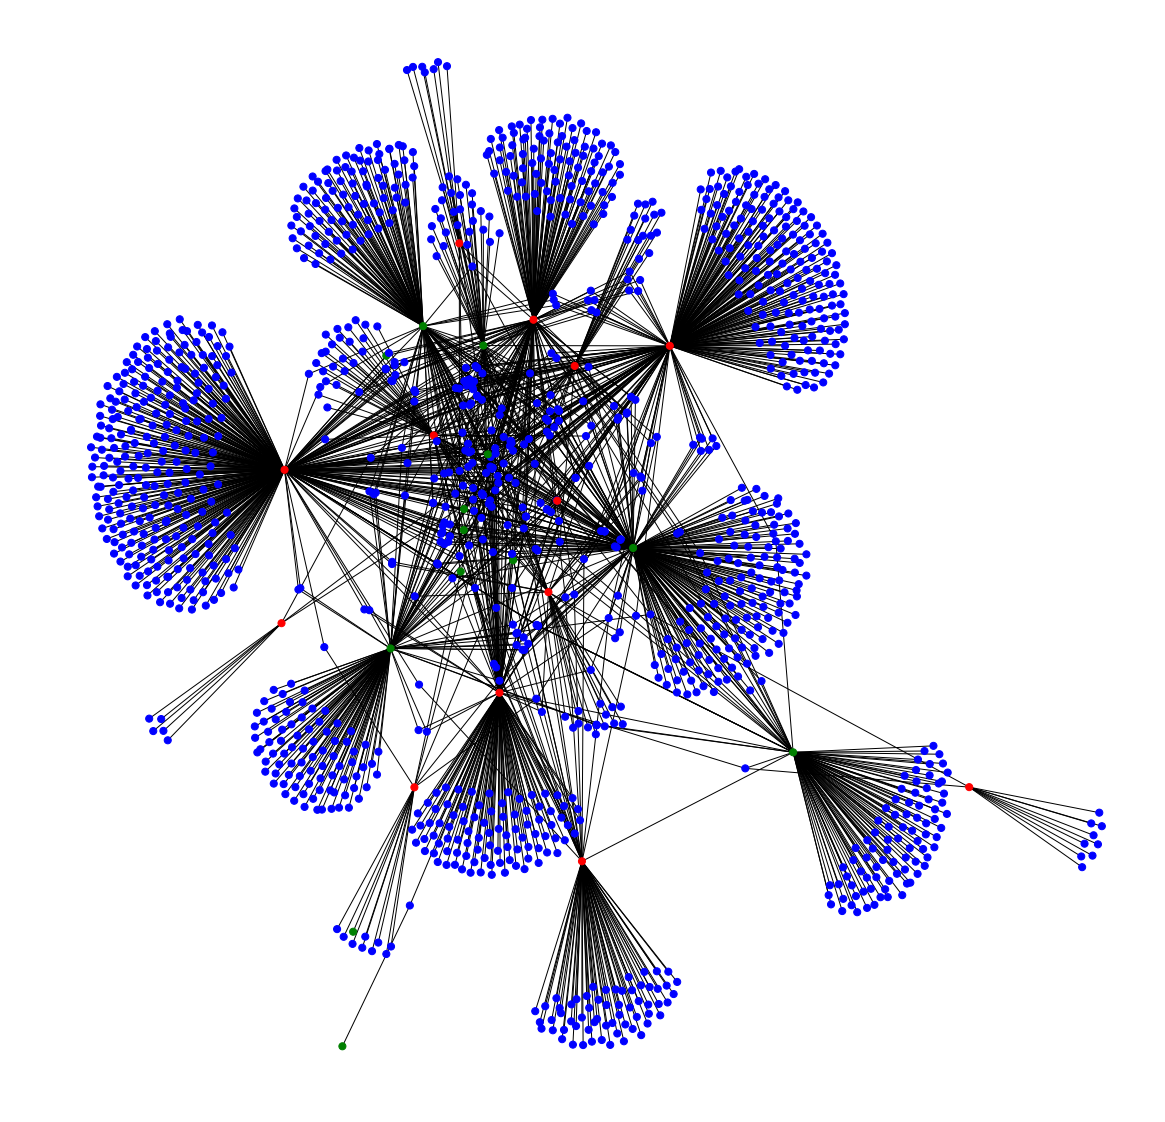

In [143]:
from matplotlib import pyplot as plt
f, axs = plt.subplots(figsize=(20,20))
nx.draw_spring(g, with_labels=False, edge_color="black", node_color=color_list, node_size=50)
plt.savefig("/tmp/graph.png")